In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Import raw dataset

In [2]:
df = pd.read_csv('diabetic_data.csv')
df_dtype_object = pd.read_csv('diabetic_data.csv',dtype='object')

## 1.1 Visualize Raw data 

In [3]:
pd.set_option('display.max_columns', 500)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## 1.2 List of features, Datatypes and Descriptions

In [4]:
data_dictionary = pd.read_csv('Data_dictionary.csv')
pd.set_option('display.max_colwidth', -1)
data_dictionary
##If want to display all the description
#data_dictionary[['Feature name','Type']]

,Feature name,Type,Description,Values
0,Encounter ID,Numeric,Unique identifier of an encounter,NaN
1,Patient number,Numeric,Unique identifier of a patient,NaN
2,Race,Category,Races of patient,"Caucasian, Asian, African American, Hispanic, and other"
3,Gender,Category,Gender of patient,"""male"", ""female"", and ""unknown/invalid"""
4,Age,Category,Grouped in 10-year intervals. Upper number exclusive,"[0-10), [10-20), ..., [90-100)"
5,Weight,Numeric,Weight in pounds.,NaN
6,Admission type,Category,Integer identifier corresponding to 9 distinct values.,"For example, emergency, urgent, elective, newborn, and not available"
7,Discharge disposition,Category,Integer identifier corresponding to 29 distinct values.,"For example, discharged to home, expired, and not available"
8,Admission source,Category,Integer identifier corresponding to 21 distinct values.,"For example, physician referral, emergency room, and transfer from a hospital"
9,Time in hospital,Numeric,Integer number of days between admission and discharge,NaN


## 1.3 Preliminary Analysis

### 1.4.1 Shape of the dataset

In [4]:
print ('Number of Observations: ', df.shape[0])
print ('Number of Features: ', df.shape[1])

Number of Observations:  101766
Number of Features:  50


### 1.4.2 Determine Features' Data Type

In [5]:
df_feature = pd.DataFrame(df.dtypes, columns = ['Data Types'])

### 1.4.3 Determine Missing Data point

Looking at the raw dataset, we can see that missing values are represented by "?", we want to determine the percentage of the missing observaction for each feature. That way we can see which features should be drop for this analysis. 

In [6]:
features = df.columns
df_feature['% observations presented'] = df[df_dtype_object[features] != '?'].count()/101766*100
df_feature

,Data Types,% observations presented
encounter_id,int64,100.000000
patient_nbr,int64,100.000000
race,object,97.766445
gender,object,100.000000
age,object,100.000000
weight,object,3.141521
admission_type_id,int64,100.000000
discharge_disposition_id,int64,100.000000
admission_source_id,int64,100.000000
time_in_hospital,int64,100.000000


# 2. Parsing and Cleaning

## 2.1 Parsing Features

As we can see, **"weight", "payer_code" and "medical_specialty"** is missing alot of the data. It will not be ideal to use these feature. 

**"encounter_id" and "patient_nbr"** are also not an potential predictors.

Also removing all the **24 features for medications, glucose serum test result and A1c test result**, Which we will not study for this project

In [7]:
df_parse = df[[i for i in df.columns if i not in ('weight','payer_code','medical_specialty','encounter_id','patient_nbr')]]
med_24 = df_parse.loc[:,'max_glu_serum':'metformin-pioglitazone'].columns
df_parse = df_parse.drop(med_24, axis=1)
df_parse.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes,NO


## 2.2 Removing rows contain missing value

Currently Race and Diag have missing value. However it is ok to only have one diagnosis code. Therefore, we only eliminating row if "race" and "diag_1" is equal to "?"

In [8]:
df_clean = df_parse[df_parse.race != '?']
df_clean = df_clean[df_clean.diag_1 != '?']
df_clean.count()

race                        99474
gender                      99474
age                         99474
admission_type_id           99474
discharge_disposition_id    99474
admission_source_id         99474
time_in_hospital            99474
num_lab_procedures          99474
num_procedures              99474
num_medications             99474
number_outpatient           99474
number_emergency            99474
number_inpatient            99474
diag_1                      99474
diag_2                      99474
diag_3                      99474
number_diagnoses            99474
change                      99474
diabetesMed                 99474
readmitted                  99474
dtype: int64

## 2.3 Redefining Features

### Recategorized Diagnosis Code

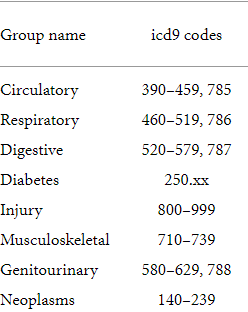

In [9]:
def replace_diag_code(code):
    if (code <= '459' and code >= '390') or code == '785':
        return 'Circulatory'
    elif (code <= '519' and code >= '460') or code == '786':
        return 'Respiratory'
    elif (code <= '579' and code >= '520') or code == '787':
        return 'Digestive'
    elif (code < '251' and code > '249'):
        return 'Diabetes'
    elif (code <= '999' and code >= '800'):
        return 'Injury'
    elif (code <= '739' and code >= '710'):
        return 'Musculoskeletal'
    elif (code <= '629' and code >= '580') or code == '788':
        return 'Genitourinary'
    elif (code <= '239' and code >= '140'):
        return 'Neoplasms'
    elif code == '?': 
        return None
    else:
        return 'Others'

### Re-mapped Catogory Variables


In [10]:
df_redefine = df_clean.copy()
## outcome
#df_redefine.readmitted.replace(['NO','<30','>30'],[0,1,2],inplace=True)

'''
## gender
df_redefine.gender.replace(['Male','Female','Unknown/Invalid'],[0,1,2],inplace=True)

## race
df_redefine.race.replace(['AfricanAmerican','Asian','Caucasian','Hispanic','Other'],[0,1,2,3,4],inplace=True)

## age
df_redefine.age.replace(
    ['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],
    [5,15,25,35,45,55,65,75,85,95],
    inplace=True)

## Change of medications
df_redefine.change.replace(['No','Ch'],[0,1],inplace=True)

## Diabetes medications
df_redefine.diabetesMed.replace(['No','Yes'],[0,1],inplace=True)
'''

## diag_1
df_redefine.diag_1 = df_redefine.diag_1.apply(replace_diag_code)

## diag_2
df_redefine.diag_2 = df_redefine.diag_2.apply(replace_diag_code)

## diag_3
df_redefine.diag_3 = df_redefine.diag_3.apply(replace_diag_code)


## Display
df_redefine

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,Diabetes,None,None,1,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,Others,Diabetes,Others,9,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,Others,Diabetes,Others,6,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,Others,Diabetes,Circulatory,7,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,Circulatory,Circulatory,Others,7,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,Circulatory,Respiratory,Diabetes,8,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,Circulatory,Circulatory,Others,8,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,Circulatory,Neoplasms,Respiratory,8,Ch,Yes,NO


# 3 Distribution of the data

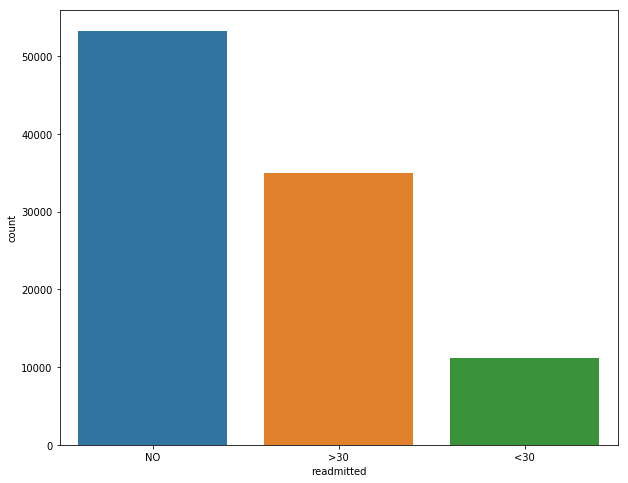

In [31]:
plt.subplots(figsize=(10,8))
ax = sns.countplot(x="readmitted", data=df_clean)

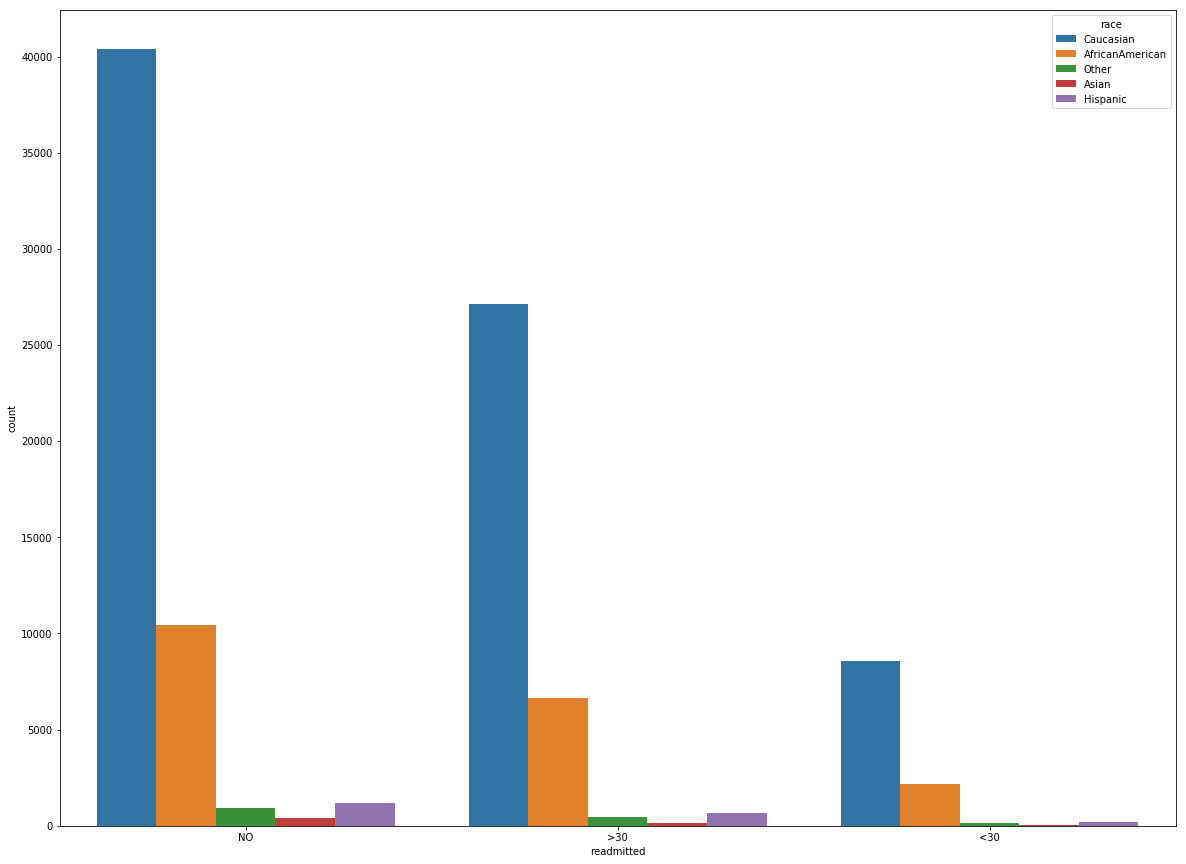

In [37]:
plt.subplots(figsize=(20,15))
ax = sns.countplot(x= "readmitted", hue = "race", data=df_clean)

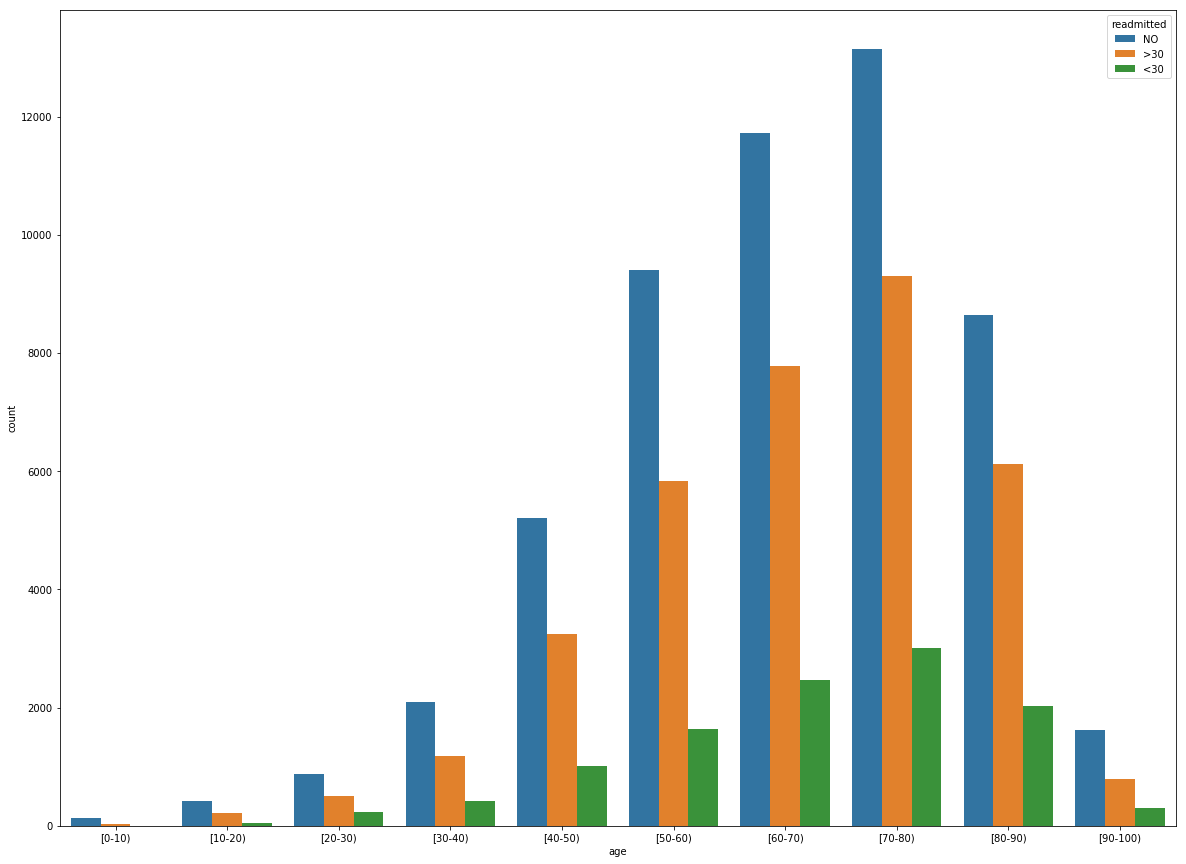

In [25]:
plt.subplots(figsize=(20,15))
ax = sns.countplot(x="age", hue = "readmitted", data=df_clean)

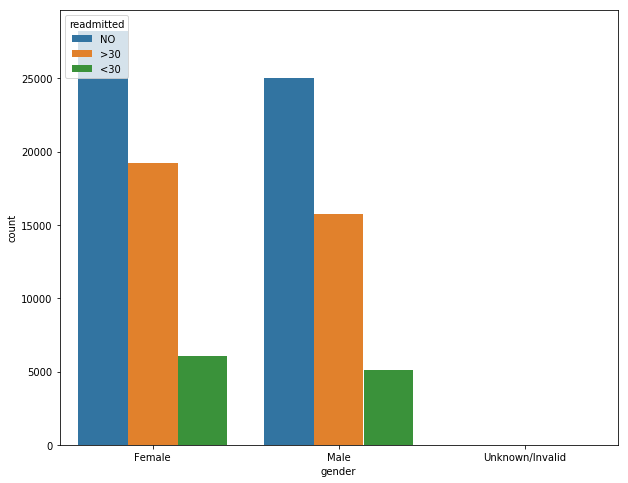

In [28]:
plt.subplots(figsize=(10,8))
ax = sns.countplot(x="gender", hue = "readmitted", data=df_clean)

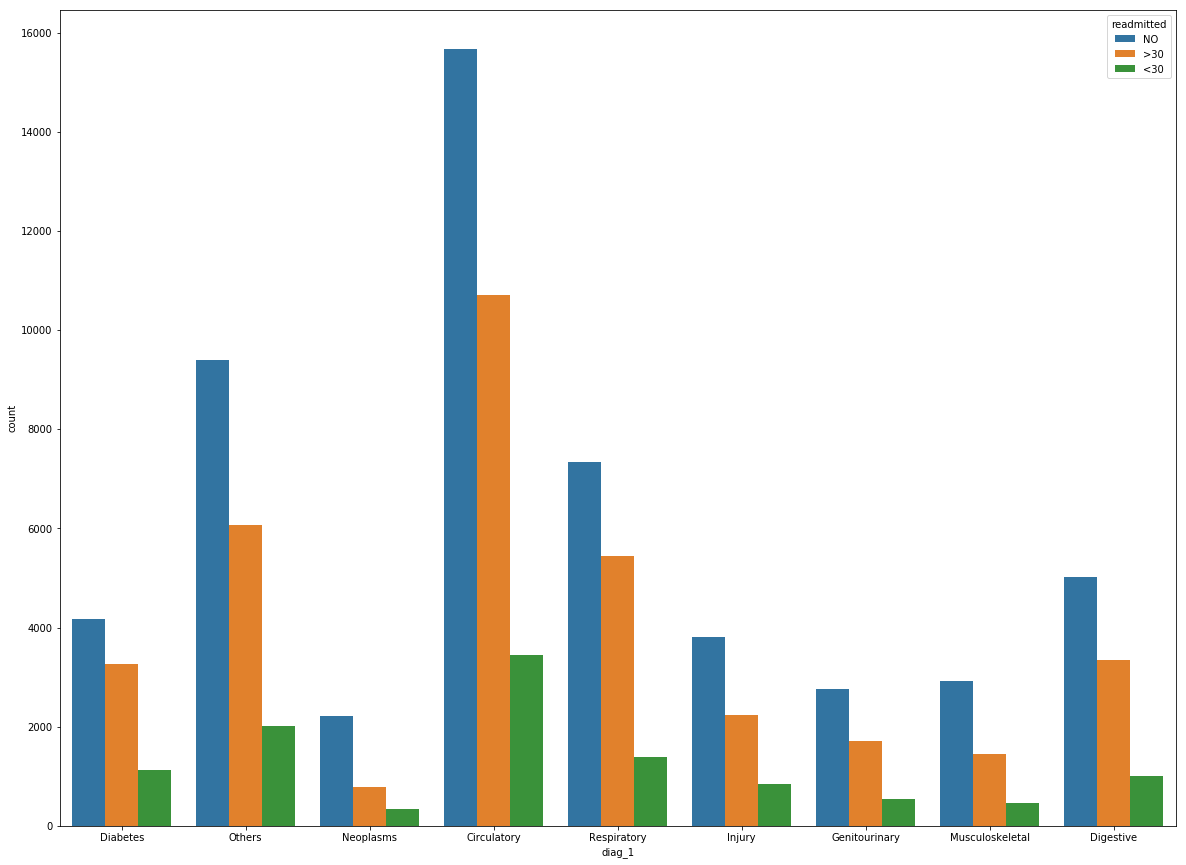

In [36]:
plt.subplots(figsize=(20,15))
ax = sns.countplot(x="diag_1", hue = "readmitted", data=df_redefine)

### Dummy

In [17]:
df_predictor = df_redefine.copy().drop('readmitted',axis=1)
#df_predictor

features = ['gender','age','num_lab_procedures','num_procedures','num_medications','diag_1','diag_2','diag_3','number_diagnoses']
dummy_columns = ['gender', 'age','diag_1','diag_2','diag_3']

#dummy_columns = ['race', 'gender', 'age', 'admission_type_id','discharge_disposition_id','admission_source_id',
#                'diag_1','diag_2','diag_3', 'change', 'diabetesMed']
df_dummy_redefine = pd.get_dummies(df_predictor[features], columns=dummy_columns,drop_first=True)
df_dummy_redefine = df_dummy_redefine.drop(['gender_Unknown/Invalid'],axis=1)
df_dummy_redefine

,num_lab_procedures,num_procedures,num_medications,number_diagnoses,gender_Male,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Others,diag_1_Respiratory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Others,diag_2_Respiratory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Others,diag_3_Respiratory
0,41,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,59,0,18,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,11,5,13,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,44,1,16,7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,51,0,8,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
5,31,6,16,9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,70,1,21,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,73,0,12,8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
8,68,2,28,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,33,3,18,8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


AxesSubplot(0.125,0.125;0.62x0.755)


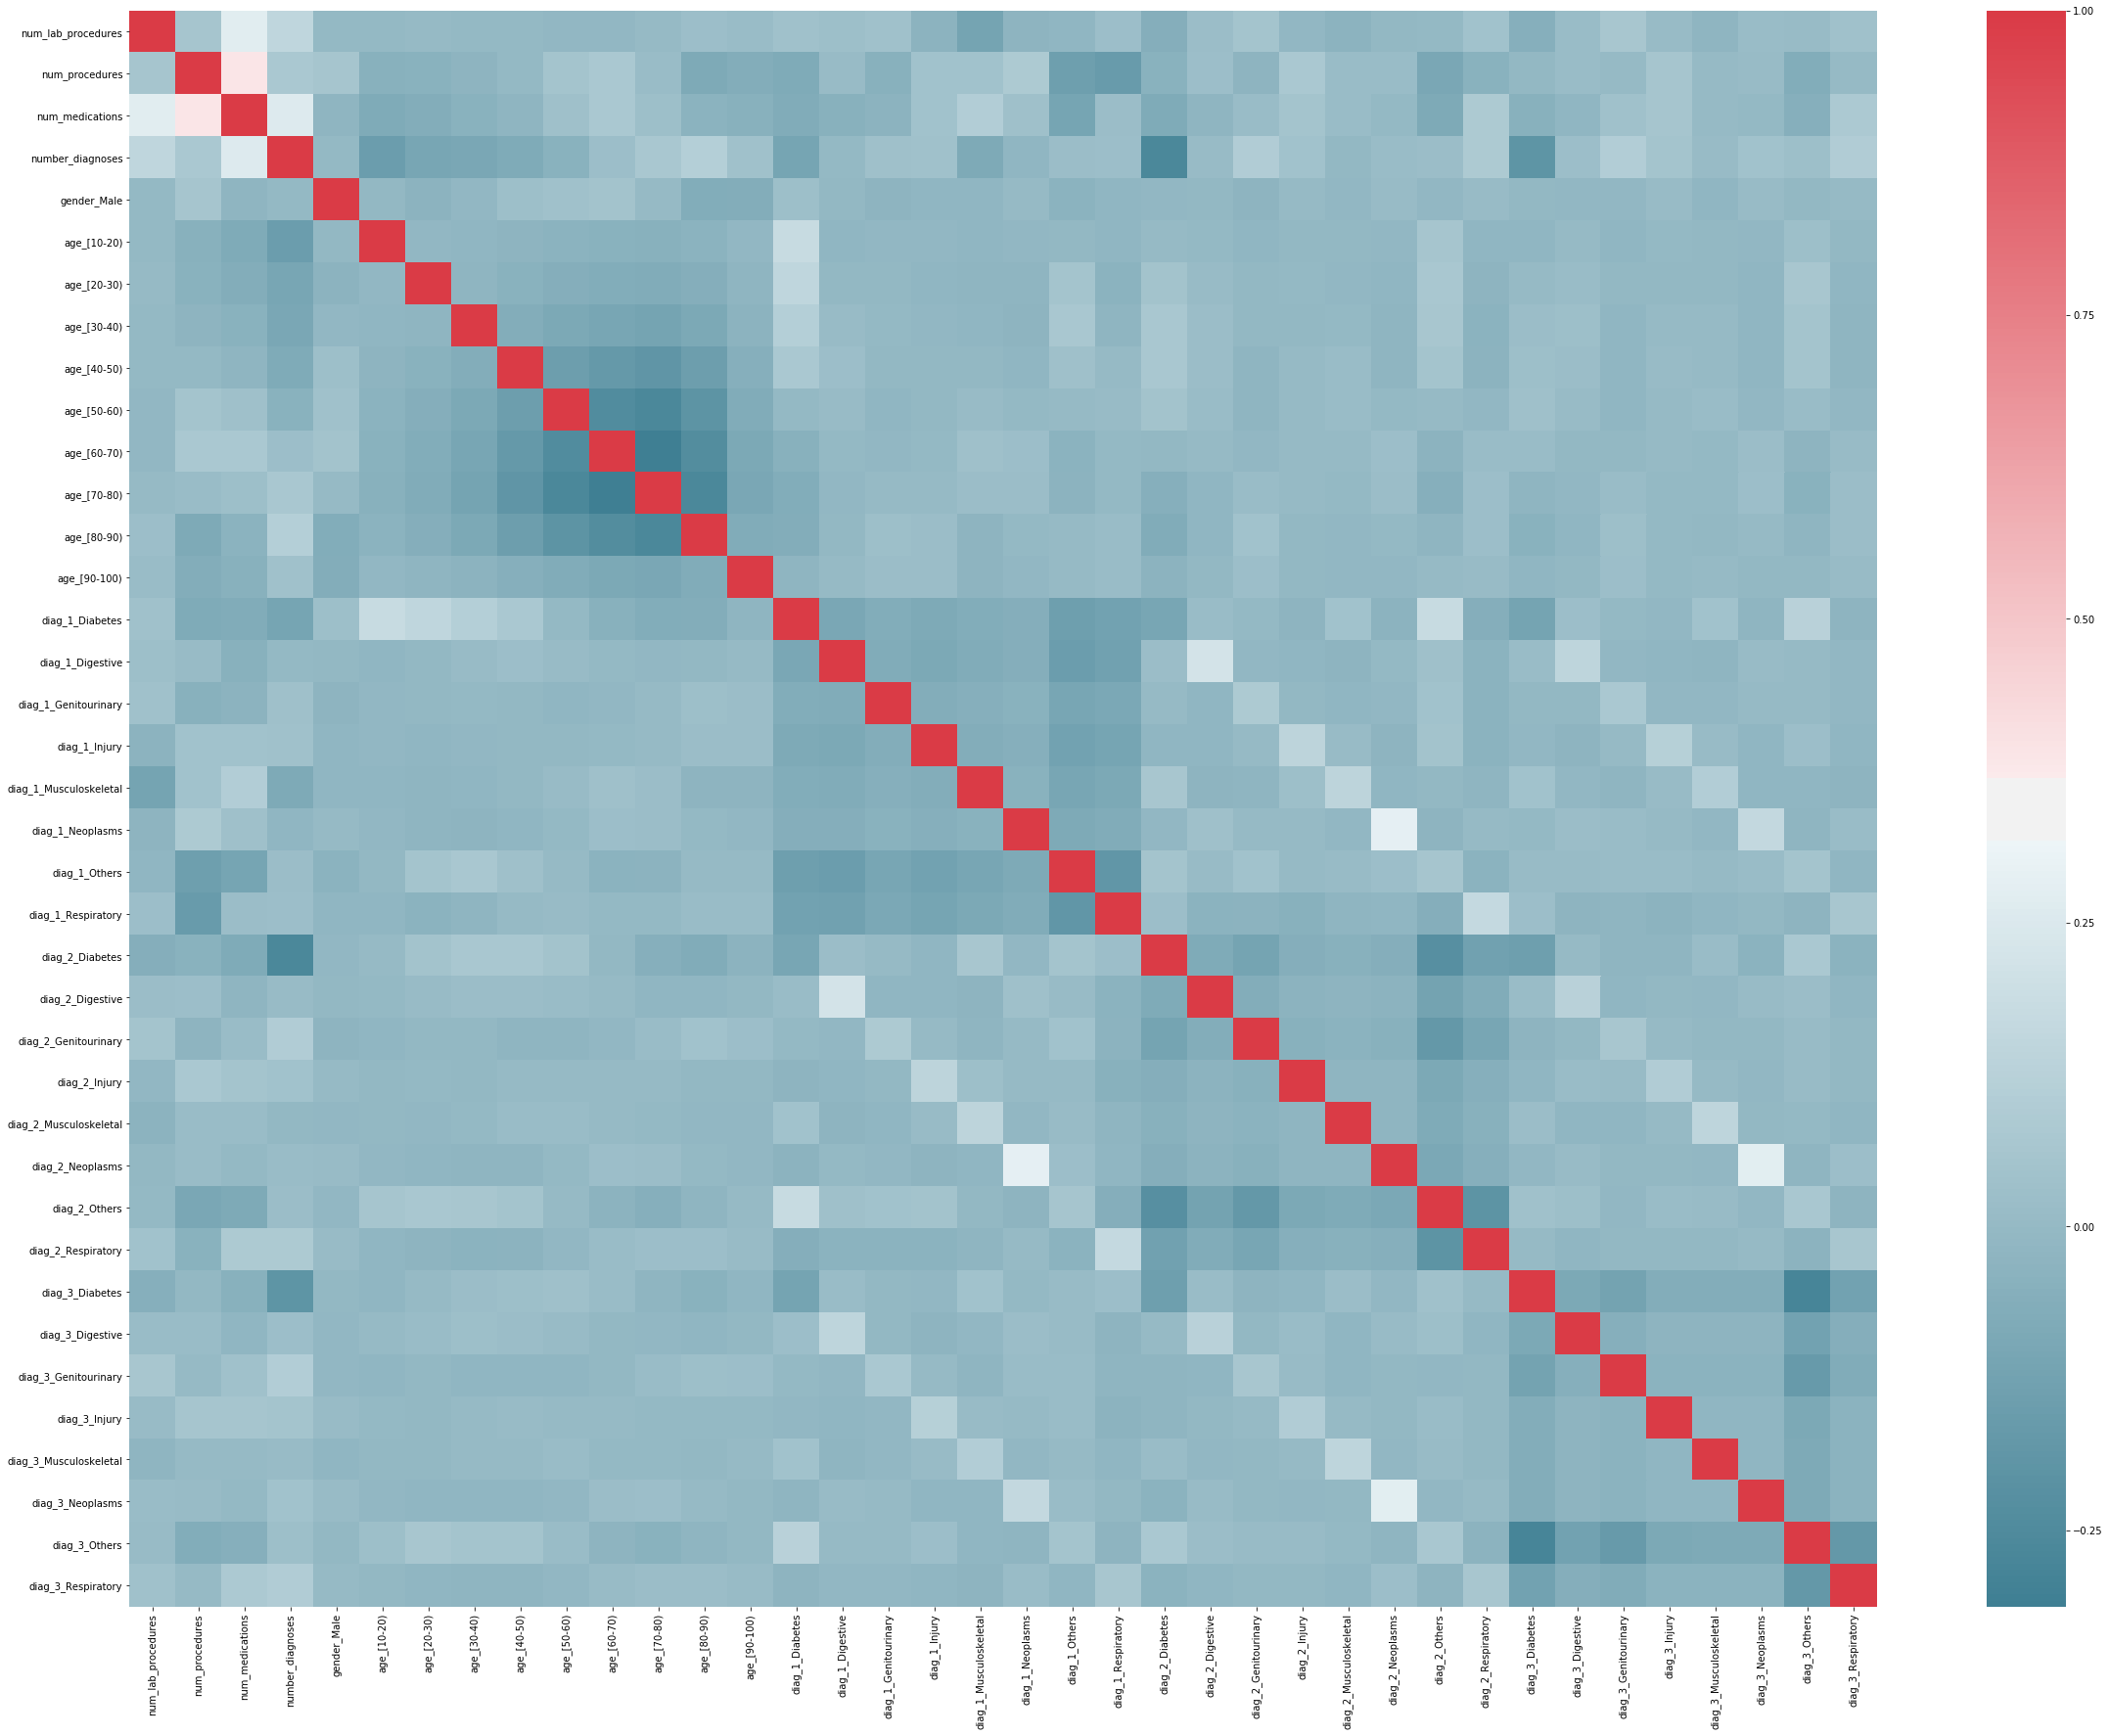

In [18]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = df_dummy_redefine.corr()

plt.subplots(figsize=(40,30))
print (sns.heatmap(correlations, cmap=cmap))

## Relationship: Independent variables and Dependent variable

# 5. Modeling

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)

X = df_dummy_redefine
y = df_redefine.readmitted
    
# Fits the model
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
from sklearn.cross_validation import cross_val_score

# ... #

scores = cross_val_score(model, X, y) #scoring = 'roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

#print('CV AUC:' + str(scores), 'Average AUC:' + str(scores.mean()))

CV AUC [ 0.5169034   0.49849207  0.49018307], Average AUC 0.5018595138394316
